In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
X = np.load('X.npy')
Y = np.load('Y.npy')

In [3]:
X.shape

(2062, 64, 64)

In [4]:
Y.shape

(2062, 10)

In [5]:
y = np.argmax(Y, axis=1)
y.shape

(2062,)

In [6]:
# Visualizing

In [7]:
def visualize_image(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)

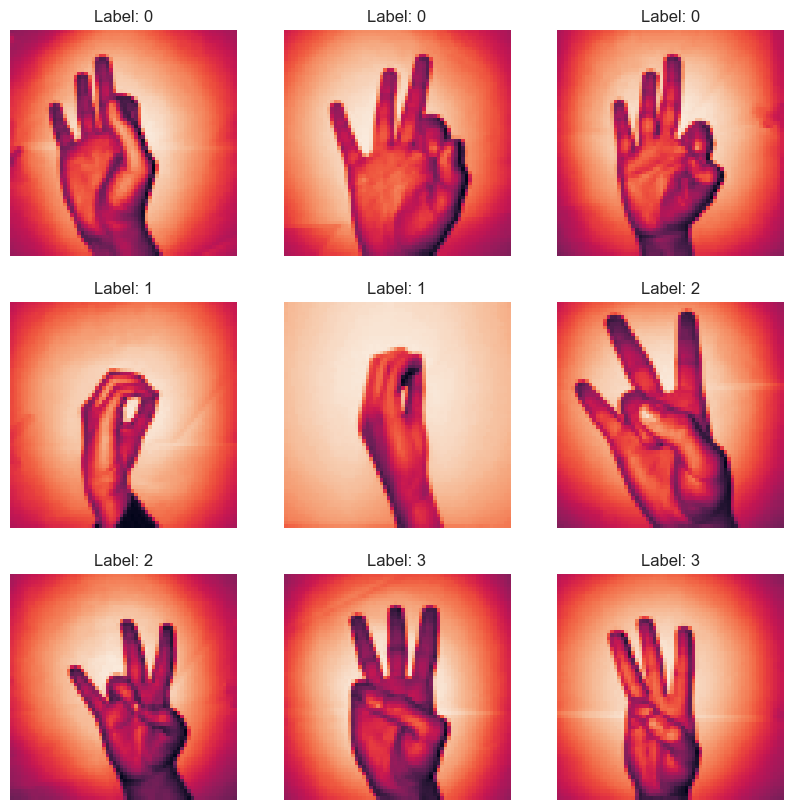

In [8]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image(X[i * 100], label="Label: " + str(y[i * 100]))

In [9]:
# Preprocessing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [11]:
# Modelong

In [12]:
inputs = tf.keras.Input(shape=(64, 64, 1))

conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pool1)
pool2 = tf.keras.layers.AveragePooling2D()(conv2)

flatten = tf.keras.layers.Flatten()(pool2)

dense1 = tf.keras.layers.Dense(units=120, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=84, activation='relu')(dense1)

outputs = tf.keras.layers.Dense(units=10, activation='softmax')(dense2)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 30, 30, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 13, 13, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 2704)              0     

In [13]:
# Training

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
37/37 [==============================] - 13s 191ms/step - loss: 2.2930 - accuracy: 0.1317 - val_loss: 2.2245 - val_accuracy: 0.2976
Epoch 2/100
37/37 [==============================] - 5s 141ms/step - loss: 1.9205 - accuracy: 0.3769 - val_loss: 1.6989 - val_accuracy: 0.4291
Epoch 3/100
37/37 [==============================] - 6s 165ms/step - loss: 1.2314 - accuracy: 0.5927 - val_loss: 1.2005 - val_accuracy: 0.6090
Epoch 4/100
37/37 [==============================] - 6s 159ms/step - loss: 0.9065 - accuracy: 0.7002 - val_loss: 0.7963 - val_accuracy: 0.7612
Epoch 5/100
37/37 [==============================] - 5s 136ms/step - loss: 0.6806 - accuracy: 0.7695 - val_loss: 0.7479 - val_accuracy: 0.7509
Epoch 6/100
37/37 [==============================] - 6s 150ms/step - loss: 0.6897 - accuracy: 0.7617 - val_loss: 0.6254 - val_accuracy: 0.8235
Epoch 7/100
37/37 [==============================] - 5s 145ms/step - loss: 0.5081 - accuracy: 0.8371 - val_loss: 0.6140 - val_accuracy: 0.792

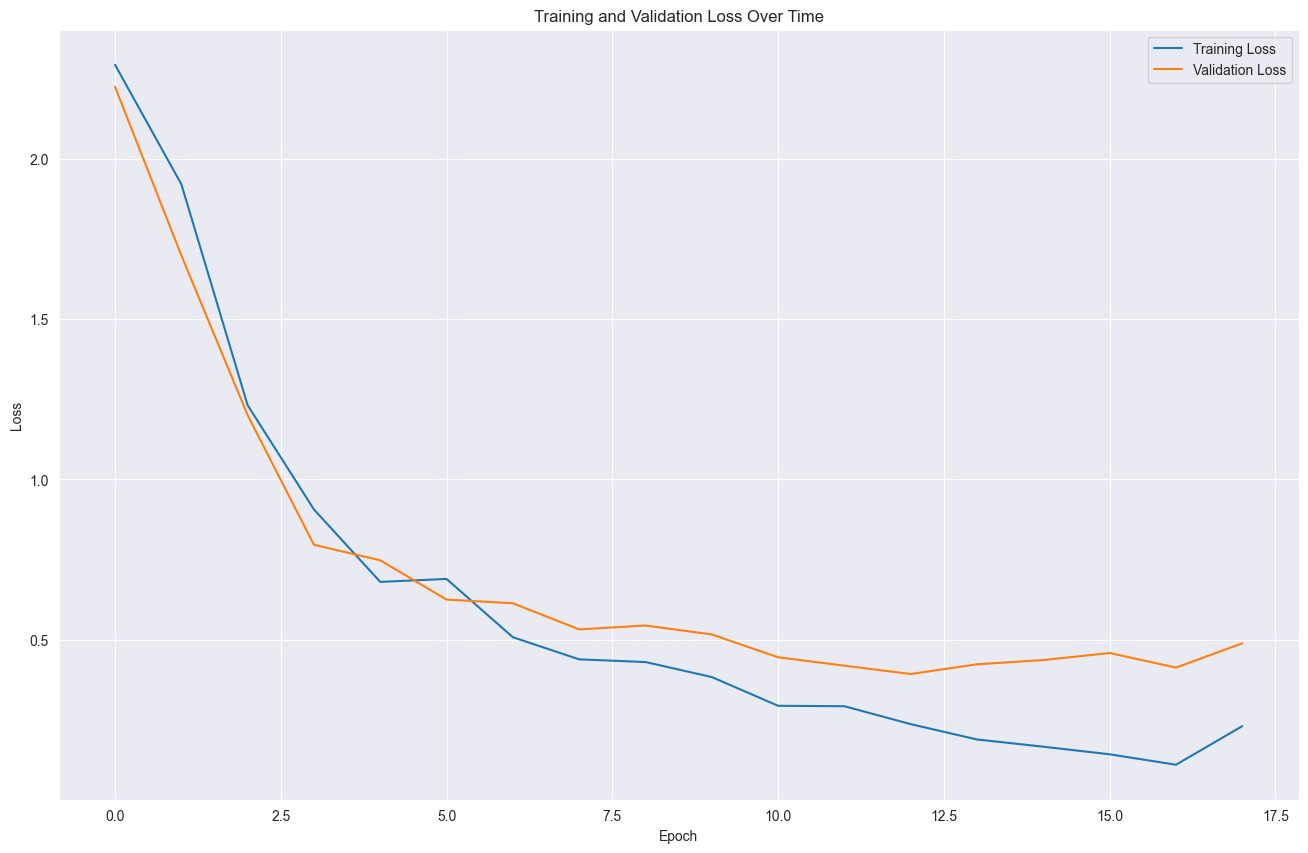

In [16]:
plt.figure(figsize=(16, 10))

epochs_range = range(len(history.history['loss']))

plt.plot(epochs_range, history.history['loss'], label="Training Loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

In [17]:
# Result

In [18]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

20/20 [==============================] - 1s 43ms/step
Test Loss: 0.56440
Test Accuracy: 84.01%


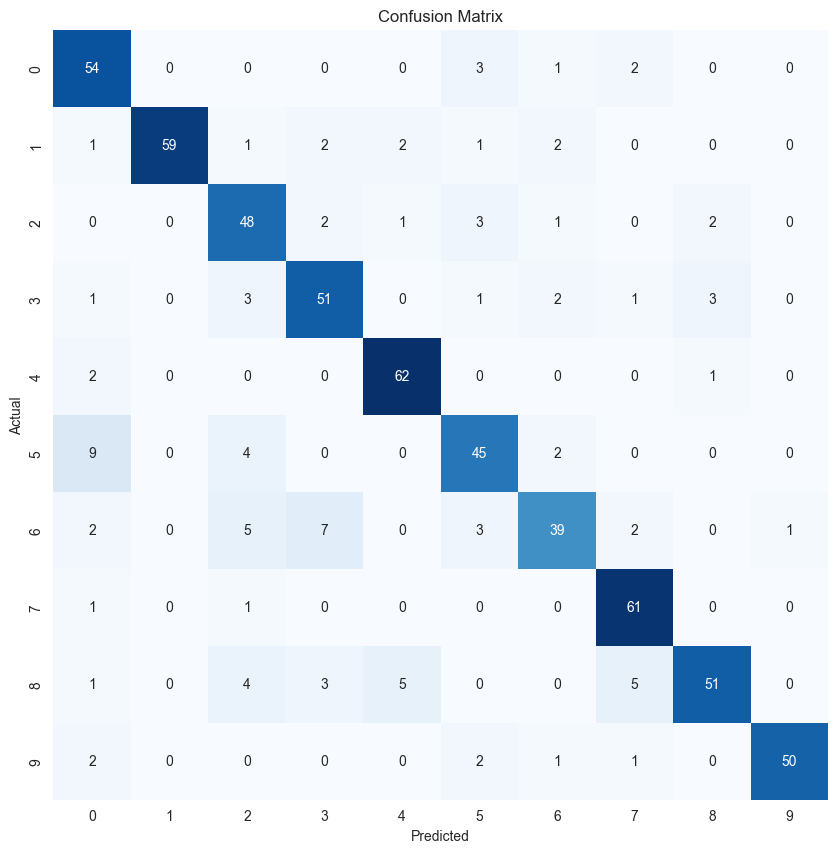

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        60
           1       1.00      0.87      0.93        68
           2       0.73      0.84      0.78        57
           3       0.78      0.82      0.80        62
           4       0.89      0.95      0.92        65
           5       0.78      0.75      0.76        60
           6       0.81      0.66      0.73        59
           7       0.85      0.97      0.90        63
           8       0.89      0.74      0.81        69
           9       0.98      0.89      0.93        56

    accuracy                           0.84       619
   macro avg       0.84      0.84      0.84       619
weighted avg       0.85      0.84      0.84       619



In [19]:
evaluate_model(model, X_test, y_test)